<a href="https://colab.research.google.com/github/ketakishirgave-visuals/internboot/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install missingno statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
import io

plt.rcParams['figure.figsize'] = (12,5)
sns.set(style="whitegrid")


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Saving transactions.csv to transactions.csv
Saving sample_submission.csv to sample_submission.csv
Saving oil.csv to oil.csv
Saving holidays_events.csv to holidays_events.csv


In [ ]:

train = pd.read_csv(io.BytesIO(uploaded['train.csv']), parse_dates=['date'])
stores = pd.read_csv(io.BytesIO(uploaded['stores.csv']))
oil = pd.read_csv(io.BytesIO(uploaded['oil.csv']), parse_dates=['date'])
holidays = pd.read_csv(io.BytesIO(uploaded['holidays_events.csv']), parse_dates=['date'])
transactions = pd.read_csv(io.BytesIO(uploaded['transactions.csv']), parse_dates=['date'])


In [ ]:

train = train.merge(oil, on='date', how='left')


train = train.merge(stores, on='store_nbr', how='left')

train = train.merge(
    holidays[['date','type','locale','locale_name','description','transferred']],
    on='date', how='left'
)



In [ ]:

print(train.isnull().sum())


train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')


train = train.drop_duplicates()


id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     21384
city               0
state              0
type_x             0
cluster            0
type_y         63468
locale         63468
locale_name    63468
description    63468
transferred    63468
dtype: int64


/tmp/ipython-input-4039742787.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')


In [ ]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
train['is_weekend'] = train['weekday'].isin([5,6]).astype(int)
train['month_name'] = train['date'].dt.month_name()
train['day_name'] = train['date'].dt.day_name()


In [ ]:
daily_sales = train.groupby('date')['sales'].sum().reset_index().set_index('date')
weekly_sales = daily_sales['sales'].resample('W').sum()
monthly_sales = daily_sales['sales'].resample('M').sum()


/tmp/ipython-input-2390414716.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales['sales'].resample('M').sum()


count        39.000000
mean     337215.364701
std      101107.127742
min        2511.618999
25%      287598.927519
50%      318347.777981
75%      408528.989993
max      519695.401088
Name: sales, dtype: float64


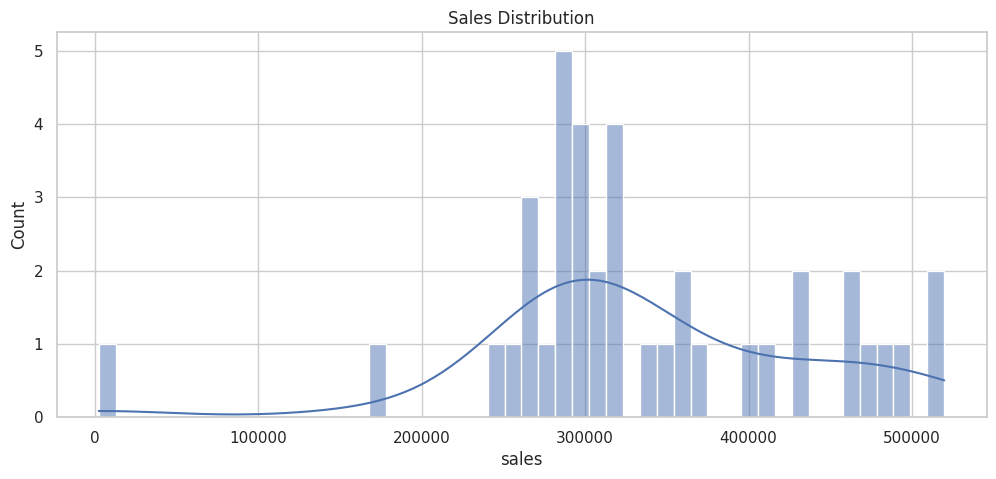

In [ ]:
print(daily_sales['sales'].describe())
sns.histplot(daily_sales['sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.show()


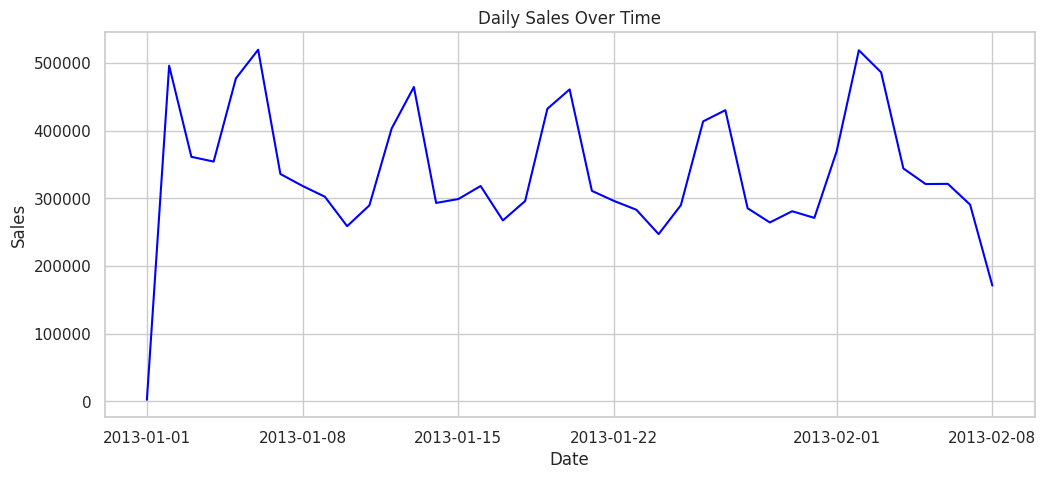

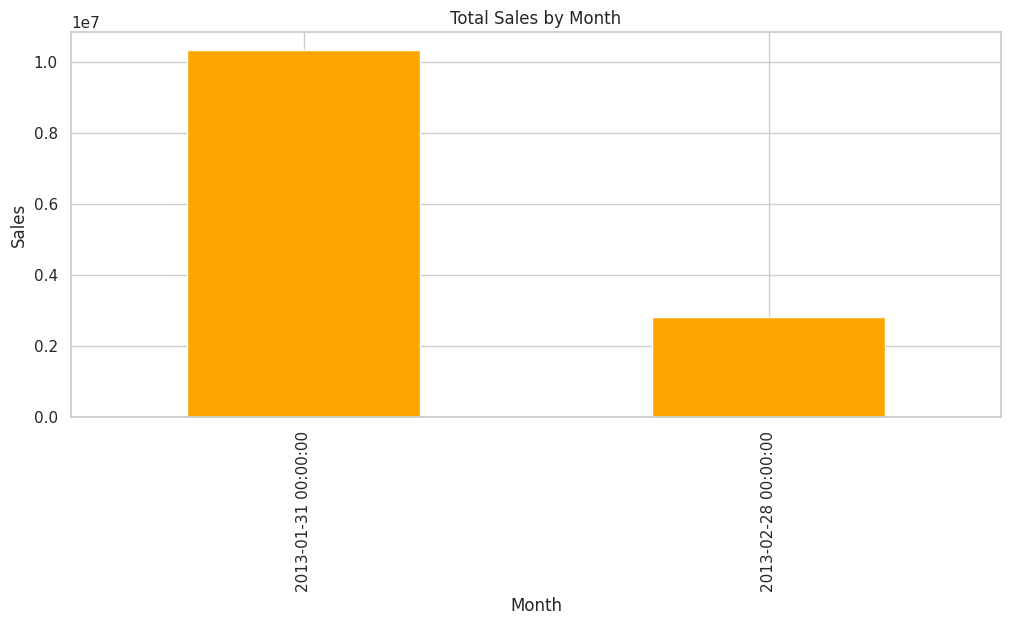

In [ ]:


plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales['sales'], color='blue')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


monthly_sales.plot(kind='bar', color= 'orange', title='Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



In [ ]:
train.to_parquet('/content/cleaned_train.parquet', index=False)
print("Cleaned dataset saved to /content/cleaned_train.parquet")


Cleaned dataset saved to /content/cleaned_train.parquet


# Task
Load the data from the files "train.csv", "oil.csv", "stores.csv", and "holidays.csv", then merge them into a single dataframe. Handle any missing values and engineer date-related features. Finally, save the cleaned data to CSV and Parquet files.

## Load the data

### Subtask:
Use `files.upload()` to upload the necessary CSV files.


**Reasoning**:
Import the `files` module and call `files.upload()` to upload the data files.



**Reasoning**:
The previous upload was interrupted. I will try uploading the files again.



## Read the csv files

### Subtask:
Read the uploaded CSV files into pandas DataFrames, ensuring dates are parsed correctly.


**Reasoning**:
The previous attempts to upload files failed. I need to attempt to upload the files again to proceed with reading them into dataframes.



In [ ]:
from google.colab import files

uploaded = files.upload()